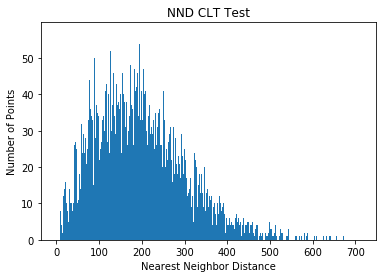

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KDTree
%matplotlib inline  

img_sz = 40000
valid_array = np.zeros([img_sz, img_sz])

num_spots = 10000
spot_list = []

for i in range(num_spots):
    coord_x = random.randint(0, img_sz-1)
    coord_y = random.randint(0, img_sz-1)
#    plt.scatter([coord_x], [coord_y])
    spot_list.append([coord_x,coord_y])
#    print(i)
#plt.show()

spots_kdt = KDTree(spot_list, leaf_size=2, metric='euclidean')

NND_list = []
for spot in spot_list:
    spot = [spot]
    dist, ind = spots_kdt.query(spot, k=2)
    NND_list.append(dist[0][1])

# print(NND_list)

step_size = 1

plt.hist(NND_list, bins = np.arange(0,max(NND_list)+step_size,step=step_size)-step_size/2)
plt.title("NND CLT Test")
plt.xlabel("Nearest Neighbor Distance")
plt.ylabel("Number of Points")
plt.show()